### A Data Collection, Cleaning and Exploratory Analysis on Accomodation Cost in comparison with Income among Young Adults

### Introduction

Most at times, it is usually challenging for young adults who are starting  out their careers or who are getting into the phase of being independent. 

Knowing that many of them go to bigger cities to make ends meet or search for greener pastures, 
accommodation is usually a major factor of concern, which at times limits one's preference.

The goal of this project is to research into this, to know how much young adults (18 - 29 years) 
spend on accommodation, in comparison to their incomes.

Data Collection was done via this [form](https://docs.google.com/forms/d/1VhtGHUs8XawrgDvc-zqtAreu5-1-BDDDs2mmmh8-iy8/edit?usp=drivesdk) which garnered 121 responses over a 7 day-period. 

The responses are collected in a CSV file which is used in this notebook. 

In [189]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [190]:
#importing dataset
data = pd.read_csv('Accommodation Assessment Form.csv')

In [191]:
#printing the first 5 rows
data.head()

,Timestamp,Age,Gender,Maximum Level of Education,Country,State/Province,"Based on your answer above, how industrious is your State of residence?",Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?
0,2021/01/20 7:57:57 AM GMT+1,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000,Yes
1,2021/01/20 9:02:40 AM GMT+1,27,Female,Bachelor's Degree/Equivalent,Kenya,Nairobi,Most industrious in the country,Kenyan Shillings,150000,Software Engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000,Yes
2,2021/01/20 9:07:23 AM GMT+1,25,Female,High/Secondary School,South Africa,Cape Town,Non-Industrious,Rand,2000,Hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,R3500,Yes
3,2021/01/20 9:27:25 AM GMT+1,28,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,0,IT,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,NaN,Yes
4,2021/01/20 9:27:53 AM GMT+1,24,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,70000,Tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,N/A,Yes


In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 17 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Timestamp                                                                                          121 non-null    object 
 1   Age                                                                                                121 non-null    int64  
 2   Gender                                                                                             121 non-null    object 
 3   Maximum Level of Education                                                                         121 non-null    object 
 4   Country                                                                                            121 non-null    object 

In [193]:
data.describe()

,Age,Monthly Salary in the currency you mentioned above,Years of working experience
count,121.000000,121.000000,121.000000
mean,23.421488,60587.603306,1.492975
std,2.798071,113215.106155,1.840282
min,18.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000
50%,23.000000,20000.000000,1.000000
75%,25.000000,70000.000000,2.000000
max,29.000000,800000.000000,10.000000


### Data Cleaning & Analysis

In [194]:
#The timestamp column is not needed in our analysis. This column will be dropped
data = data.drop('Timestamp', axis=1)
data.head()

,Age,Gender,Maximum Level of Education,Country,State/Province,"Based on your answer above, how industrious is your State of residence?",Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?
0,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000,Yes
1,27,Female,Bachelor's Degree/Equivalent,Kenya,Nairobi,Most industrious in the country,Kenyan Shillings,150000,Software Engineer,3.0,Yes,NaN,Shared Flat,Mid-class area,35000,Yes
2,25,Female,High/Secondary School,South Africa,Cape Town,Non-Industrious,Rand,2000,Hospitality,5.0,Yes,NaN,Shared Flat,Mid-class area,R3500,Yes
3,28,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,0,IT,0.0,No,NaN,Neither. I do not pay rents,I do not pay rents,NaN,Yes
4,24,Female,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,70000,Tech,1.0,Not completely,1/4,Neither. I do not pay rents,Low brow area,N/A,Yes


In [195]:
#As this project is targeted towards young adults who are footing their accomodation bills.
#We drop rows of people who do not foot their accomodation bills
data = data.loc[data['Do you foot your accommodation bills?'] != 'No']


In [196]:
#the subset of people who pay their rents with roommates
half_rent = data.loc[data['Do you foot your accommodation bills?'] == 'Not completely']

In [197]:
#the subset of people who pay their rents themselves completely
complete_rent = data.loc[data['Do you foot your accommodation bills?'] == 'Yes']

In [198]:
#due to the economy differences we will split the analysis into subsets depending on the currency they earn in
complete_rent['Currency'] = complete_rent['Currency'].replace({'Naira ':'Naira', ' Naira':'Naira', 'NAIRA':'Naira', 'Naira, Dollars':'Naira'})
complete_rent['Currency'].value_counts()

Naira               36
Kenyan Shillings     2
Rand                 1
Name: Currency, dtype: int64

In [199]:
#As the data from people who earn in Kenyan Shillings and Rand is very little. 
#We can not draw suitable conclusions from so little data
#We will only concern ourselves with those who earn in Naira

In [200]:
naira_complete_rent = complete_rent.loc[complete_rent['Currency'] == 'Naira']


In [201]:
#cleaning the location to be of accepted format
naira_complete_rent['State/Province'] = naira_complete_rent['State/Province'].replace({'FCT Abuja':'Abuja', 'FCT':'Abuja', 'FEDERAL CAPITAL TERRITORY, ABUJA':'Abuja', 'LAGOS':'Lagos', 'OYO':'Oyo', 'Oyo state':'Oyo'})


In [202]:
naira_complete_rent['Accommodation Rented'].value_counts()
#The most type of accomodation is Self-contained, Mini Flats and Shared Flats are common also. 

Self-contained      17
Mini Flat            5
Shared Flat          5
Full Flat            4
Studio apartment     3
Single room          1
Shared Duplex        1
Name: Accommodation Rented, dtype: int64

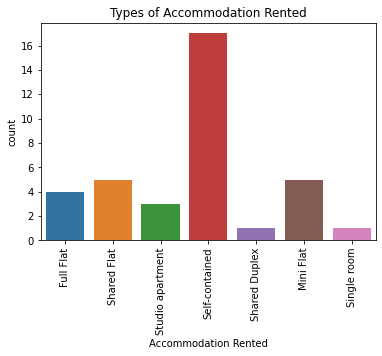

In [203]:
sns.countplot(x='Accommodation Rented', data=naira_complete_rent)
plt.title('Types of Accommodation Rented')
plt.xticks(rotation=90)
plt.show()

In [204]:
naira_complete_rent['Monthly Salary in the currency you mentioned above'].value_counts()
# the monthly salary range is 0-800,000 Naira

80000     4
20000     3
100000    3
0         3
200000    3
40000     2
50000     2
30000     2
500000    2
150000    2
800000    1
190000    1
70000     1
103000    1
145000    1
4000      1
143000    1
450000    1
60000     1
62000     1
Name: Monthly Salary in the currency you mentioned above, dtype: int64

In [205]:
naira_complete_rent['Location of accommodation'].value_counts()
#Over 70% of the respondents live in Mid-class areas

Mid-class area    26
Low brow area      8
High brow area     2
Name: Location of accommodation, dtype: int64

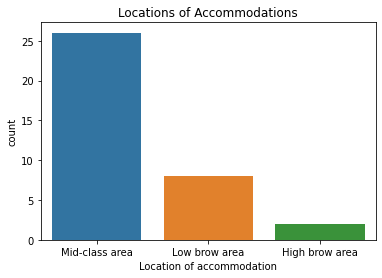

In [206]:
sns.countplot(x='Location of accommodation', data=naira_complete_rent)
plt.title('Locations of Accommodations')
plt.show()

In [208]:
#the Cost of accomodation per month will have to be cleaned as some rows contain strings, commas, and spaces
import re
naira_complete_rent['Cost of your accommodation per month'] = naira_complete_rent['Cost of your accommodation per month'].apply(lambda x: re.sub(r'[a-z\s,#]+', '', x))


In [209]:
#convert the Cost of your accommodation per month column to integer
naira_complete_rent['Cost of your accommodation per month'] = naira_complete_rent['Cost of your accommodation per month'].astype('int')

In [210]:
#The numbers 15 and 45 will be dropped as they are disrepancies in our data set 
naira_complete_rent = naira_complete_rent[~naira_complete_rent['Cost of your accommodation per month'].isin([45, 15])]

In [211]:
naira_complete_rent['Cost of your accommodation per month'].value_counts()
#The range of accommodation cost per month is 2500 - 700,000

5000      3
25000     3
17000     2
15000     2
10000     2
12000     1
300000    1
33333     1
2500      1
3333      1
6250      1
40000     1
23000     1
55000     1
120000    1
20833     1
20000     1
60000     1
167000    1
6500      1
1000      1
180000    1
700000    1
22000     1
30000     1
35000     1
80000     1
Name: Cost of your accommodation per month, dtype: int64

In [212]:
#create a new column that shows the percent of income spent on accommodation
naira_complete_rent['percent_accommodation_income'] = naira_complete_rent['Cost of your accommodation per month']/naira_complete_rent['Monthly Salary in the currency you mentioned above']

In [213]:
naira_complete_rent.head()

,Age,Gender,Maximum Level of Education,Country,State/Province,"Based on your answer above, how industrious is your State of residence?",Currency,Monthly Salary in the currency you mentioned above,Career Industry,Years of working experience,Do you foot your accommodation bills?,"If you selected ""Not completely"", what fraction of the rent do you pay?",Accommodation Rented,Location of accommodation,Cost of your accommodation per month,Do you think accommodation prices are generally high in your State of residence for young adults?,percent_accommodation_income
0,24,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Industrious,Naira,150000,Accounting & Tech,1.0,Yes,NaN,Full Flat,Mid-class area,80000,Yes,0.533333
9,27,Male,Bachelor's Degree/Equivalent,Nigeria,Delta,Industrious,Naira,145000,Engineering,3.0,Yes,NaN,Full Flat,Low brow area,20000,Yes,0.137931
14,23,Male,Bachelor's Degree/Equivalent,NIGERIA,OSUN,Non-Industrious,Naira,50000,AGRICULTURE,2.0,Yes,NaN,Shared Flat,Low brow area,6500,Yes,0.130000
15,28,Female,Master's Degree,Nigeria,Abuja,Industrious,Naira,500000,Consulting,2.0,Yes,NaN,Studio apartment,Mid-class area,55000,Yes,0.110000
16,29,Male,Bachelor's Degree/Equivalent,Nigeria,Lagos,Most industrious in the country,Naira,80000,Development,3.0,Yes,NaN,Self-contained,Low brow area,15000,Yes,0.187500


In [214]:
#divide the dataset into 4 groups baseed on percent of income spent on accommodation 
labels = ['low', 'medium', 'high', 'very high']
bins = [0.0, 0.25, 0.50, 0.75, 1.0]
naira_complete_rent['rent_category'] = pd.cut(naira_complete_rent['percent_accommodation_income'], bins=bins, labels=labels)

In [215]:
naira_complete_rent['rent_category'].value_counts()
#75% of our responses spend between 1-25% of their incomes on accommodation
#21% of our responses spend between 26-50% of their incomes on accommodation

low          18
medium        5
high          1
very high     0
Name: rent_category, dtype: int64

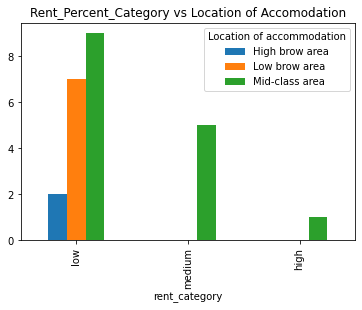

In [224]:
rent_and_area_of_accommodation = pd.crosstab(naira_complete_rent['rent_category'], naira_complete_rent['Location of accommodation'])
rent_and_area_of_accommodation.plot(kind='bar')
plt.title('Rent_Percent_Category vs Location of Accomodation')
plt.show()

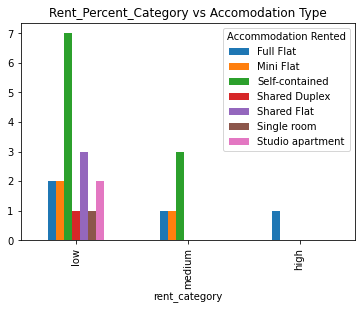

In [225]:
rent_and_type_of_accommodation = pd.crosstab(naira_complete_rent['rent_category'], naira_complete_rent['Accommodation Rented'])
rent_and_type_of_accommodation.plot(kind='bar')
plt.title('Rent_Percent_Category vs Accomodation Type')
plt.show()

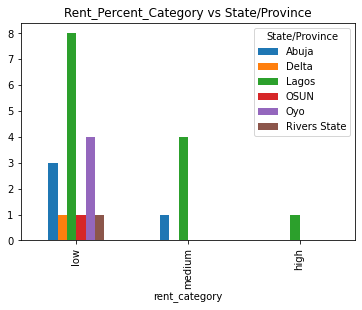

In [226]:
rent_and_state = pd.crosstab(naira_complete_rent['rent_category'], naira_complete_rent['State/Province'])
rent_and_state.plot(kind='bar')
plt.title('Rent_Percent_Category vs State/Province')
plt.show()

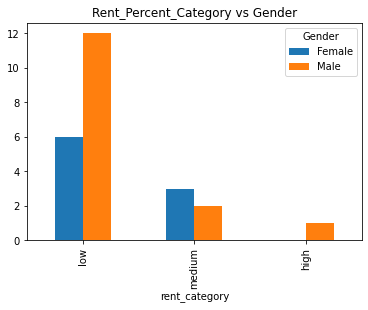

In [227]:
rent_and_gender = pd.crosstab(naira_complete_rent['rent_category'], naira_complete_rent['Gender'])
rent_and_gender.plot(kind='bar')
plt.title('Rent_Percent_Category vs Gender')
plt.show()

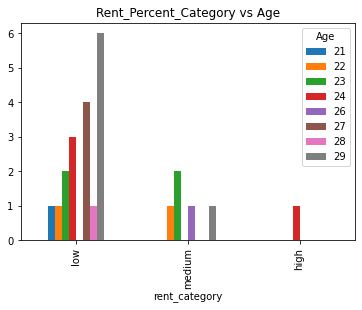

In [229]:
rent_and_age = pd.crosstab(naira_complete_rent['rent_category'], naira_complete_rent['Age'])
rent_and_age.plot(kind='bar')
plt.title('Rent_Percent_Category vs Age')
plt.show()

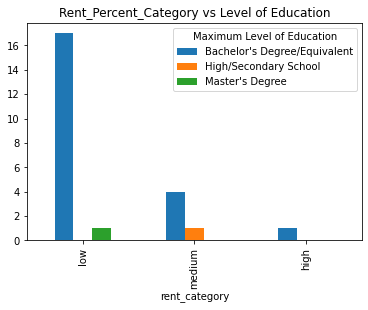

In [230]:
rent_and_education = pd.crosstab(naira_complete_rent['rent_category'], naira_complete_rent['Maximum Level of Education'])
rent_and_education.plot(kind='bar')
plt.title('Rent_Percent_Category vs Level of Education')
plt.show()

### Conclusion

This analysis focused mostly on young adults who completely pay their rents and earn in Naira. 

75% of people in this category spend about 25% of their monthly earnings on acoommodation. 

Most of these accommodations are located in Mid-Class Areas.

Self-contained type houses are the also the most common.

Most of the people in this category fall between the ages of 23-29, with Bachelor's Degree/Equivalent education levels.
